# Final Project: Which countries produce the best drivers?

### Group Members: Frank Feng, Stephanie Ma


Formula 1 Racing is the highest class of international auto racing series for open-wheel single-seater formula racing cars. In each team, constructors design and build their own cars, and drivers need to complete a set number of laps to earn points. At the end of the season, the driver and constructor with the most points will be the world champions for F1.


In this project, we will identify which countries produce the best drivers in F1 by examining the average points for each driver from each country. We aim to find out the correlation between a driver's nationality and their excellence in F1. The correlation can provide insights  into the effectiveness of different countries' training systems and methodologies in nurturing exceptional racing talent.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

We use results and drivers datasets in this project. 

Each row of results dataset shows the information of a driver's result, including the result id (resultId), driver's number (number), starting grid position (grid), final position (position, positionText, positionOrder), points earned (points), number of completed laps (laps), finishing time (time & milliseconds), the lap number of fastest lap (fastestLap), fastest lap rank (rank), fastest lap time (fastestLapTime), fastest lap speed (fastestLapSpeed), and foreign keys to other tables (raceId, driverId, constructorId, statusId). There are 25840 observations in this table.

Each row of drivers dataset shows the information of each driver, including driver's Id (driverId), unique driver identifier (driverRef), permanent driver number (number), driver's name (forename, surname), driver's birthday (dob), nationality (nationality), and their Wikipedia page link (url). There are 856 observations in this table.

In [14]:
results_raw  = pd.read_csv("raw_data/results.csv")
drivers_raw  = pd.read_csv("raw_data/drivers.csv")

We used driverId as the common key to merge results and drivers datasets. The resulting table shows driverId, drivers' name, nationality, points, and rank.

In [15]:
merged_data = pd.merge(drivers_raw[["driverId", "forename", "surname", "nationality"]],
                       results_raw[["driverId", "points", "rank"]],
                       on = "driverId",
                       how = "left")
merged_data

,driverId,forename,surname,nationality,points,rank
0,1,Lewis,Hamilton,British,10.0,2
1,1,Lewis,Hamilton,British,4.0,3
2,1,Lewis,Hamilton,British,0.0,19
3,1,Lewis,Hamilton,British,6.0,3
4,1,Lewis,Hamilton,British,8.0,2
...,...,...,...,...,...,...
25837,855,Guanyu,Zhou,Chinese,0.0,17
25838,855,Guanyu,Zhou,Chinese,0.0,8
25839,856,Nyck,de Vries,Dutch,2.0,13
25840,857,Oscar,Piastri,Australian,NaN,NaN


We used "groupby" and "agg" to get the sum_points for drivers from each country and sorted the result in descending order.

In [16]:
sum = merged_data.groupby("nationality").agg(sum_points = ("points","sum"))
sum_sorted = sum.sort_values(["sum_points"], ascending=False)
sum_sorted

,sum_points
nationality,
British,10566.64
German,7946.50
Finnish,4378.50
French,3463.33
Brazilian,3423.00
Spanish,2906.50
Australian,2828.50
Italian,2041.66
Dutch,2012.50


We used "groupby" and "nunique" to find the number of unique drivers in each country and arranged them in a descending order. Then, a dictionary was used to give titles to the columns in the resulting table. 

In [17]:
drivers_per_country_series = drivers_raw.groupby('nationality')['driverId'].nunique().sort_values(ascending=False)
drivers_per_country = drivers_per_country_series.to_frame()
drivers_per_country = drivers_per_country.rename(columns={'driverId':'unique_drivers'})
drivers_per_country

,unique_drivers
nationality,
British,165
American,158
Italian,99
French,73
German,50
Brazilian,32
Argentine,24
Swiss,23
South African,23


We merged the table of the unique drivers and the table of sum points by the nationality to find the average points per driver in each country. The resulting table shows each nationality along with the number of unique drivers, total points, and the average points per unique driver. 

In [34]:
merged_data_2 = pd.merge(drivers_per_country, sum_sorted, on = 'nationality', how = 'inner')
merged_data_2['averge_points_per_driver'] = merged_data_2['sum_points']/merged_data_2['unique_drivers']
final=merged_data_2.sort_values(by = 'averge_points_per_driver', ascending = False)
final

,unique_drivers,sum_points,averge_points_per_driver
nationality,,,
Finnish,9,4378.50,486.500000
Polish,1,274.00,274.000000
Monegasque,4,855.00,213.750000
Mexican,6,1281.00,213.500000
Spanish,15,2906.50,193.766667
German,50,7946.50,158.930000
Australian,18,2828.50,157.138889
Dutch,18,2012.50,111.805556
Brazilian,32,3423.00,106.968750


The descending barplot shows the average points for each unique driver organized by their respective nationalities.

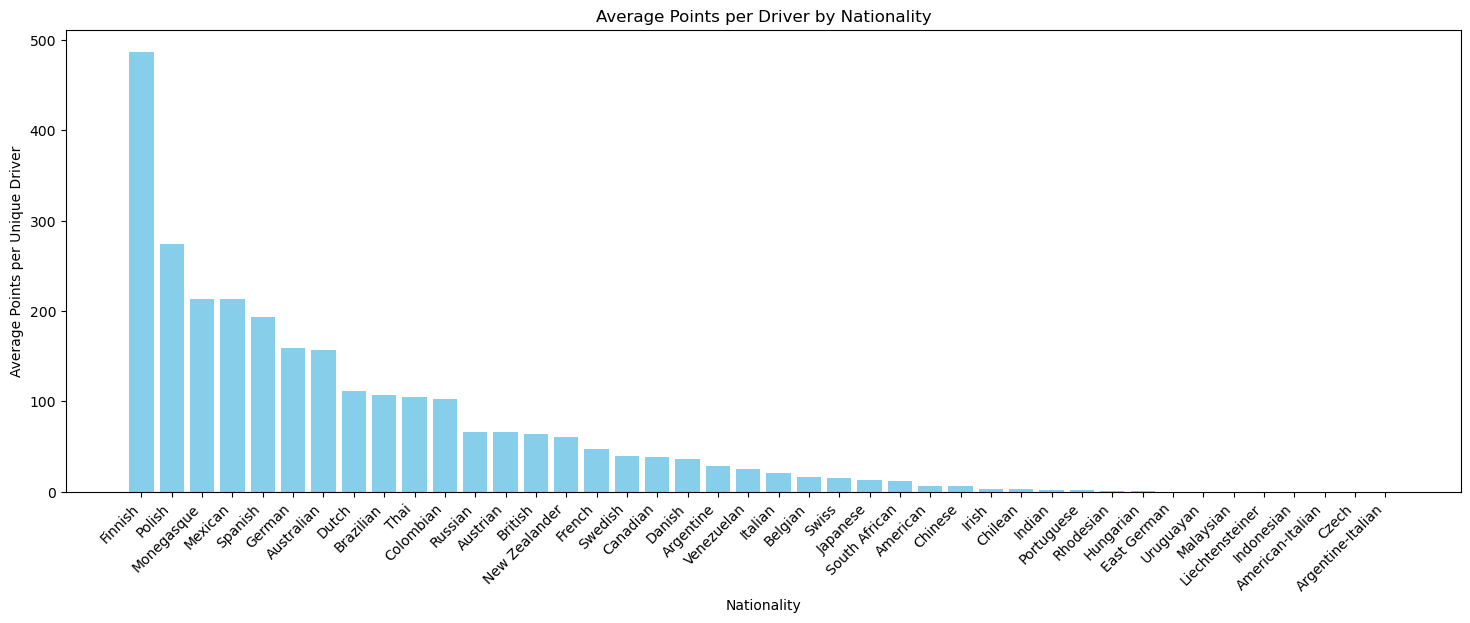

In [35]:
plt.figure(figsize=(18, 6))
plt.bar(final.index, final['averge_points_per_driver'], color='skyblue')
plt.title('Average Points per Driver by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Average Points per Unique Driver')
plt.xticks(rotation=45, ha='right') 
plt.show()

### Discussion


Based on the barplot and the table, we can find out that Finland has the highest average points per driver, which is 486.5 points per driver. Setting the average points as the benchmark for evaluating drivers' talents from a country, we can say that Finland is the leading country in producing the best drivers.